# 🐦💬 **PUBLIC SENTIMENTAL ANALYSIS OF TWEETS ABOUT APPLE AND GOOGLE PRODUCTS USING `NLP`**  

## **Business Understanding**
###  Business overview:
A *Tweet* is a short  message shared by users on  **Twitter**(*now known as X*) expressing their opinions, experiences, or reactions towards  events, products, and brands. Tweets can include  texts, images, videos, and links.
In this project, we focus on analysing tweets about `APPLE` and `GOOGLE` products. The dataset, provided by **Crowdflower via Data.world**, contains over 9000 tweets labeled by human raters as positive, negative, or neutral in sentiment. The primary objective of this project is to  develop a Natural Language Processing model  that can automatically identify tweets based on their text. 

## **Stake Holders**
* APPLE and GOOGLE Management Team

## **Problem Statement**
* Users frequently share their views and experiences about Apple and Google products on Twitter. However, the massive volume of tweets makes it challenging to assess the general public sentiment manually. A system that can automatically detect whether a tweet is positive, negative, or neutral would make this process easier and faster.

## **Business Objectives**
### Main Objective: 
*  The main goal of this project is to build an `NLP` model that can rate the sentiment of a Tweet based on its content.

### Specific objectives:
1. To compare the distribution of positive  and negative sentiments in tweets about Apple and Google products.
2. To build and refine an NLP sentiment model, beginning with binary classification and later expanding to Multiclass, evaluated using appropriate performance metrics.
3. To evaluate the model’s predictions and interpret sentiment trends to draw meaningful business insights.


## **Reasearch Questions**
1. Which of these two companies, Apple or Google, receives more positive or negative sentiment in tweets?
2. How does expanding a sentiment model from binary to multiclass classification affect its accuracy and ability to capture real public sentiment?
3. How accurately can the model predict tweet sentiments, and what do the results reveal about public perceptions of Apple and Google products?


## **Project Goals**
* To develop an effective Natural Language Processing (NLP) model capable of automatically determining the sentiment expressed in tweets about Apple and Google products.
* To analyze and interpret public sentiment trends toward Apple and Google to provide meaningful insights that can support brand perception and marketing decisions.


## **Success Criteria**
* Model performance: The NLP model achieves a high level of accuracy and reliability in classifying tweet sentiments (positive, negative, and neutral)
* Actionable insight: The analysis provides clear, data-driven insights into public perceptions of Apple and Google products.



## **Data Understanding**
### Data source and Description:
* **source**: This data is  from CrowdFlower. It is publicly available for use in data science projects. For more information about the data, follow this publicly hosted link[data.world](https://data.world/crowdflower)
*  **Description**:  The dataset  contains Twitter tweets  from users about Apple and Google products. It includes 3 features and 9093 records. Our target is to predict the sentiment (positive, negative, or neutral) based on the text in each tweet.
  

* **Feature Name and their description**
                 
> **tweet_text**: The actual content of the tweet as written by the user. This serves as the main input                                                               for Natural Language Processing (NLP) to determine the expressed sentiment.

> **is_there_an_emotion_directed_at_a_brand_or_product**: The target variable indicating whether a tweet expresses a positive, negative, or                                                                  neutral emotion toward a brand or product.

> **emotion_in_tweet_is_directed_at**: Specifies the brand, company, or product that the emotion is directed at (e.g., *Apple,                                                             Google, iPhone, Android*). This helps in comparing sentiment between brands.                                  


  

## Data Loading and Exploration 
###  Import neccessary libraries for the project:


In [4]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # natural language toolkit
import re # regular expressions
import string
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Nltk necessary tools 
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

 Downloading  NLTK data resources later to use later: tokenizers, stopwords, WordNet lemmatizer resources, and the Gutenberg corpus.

* punkt — required by word_tokenize.

* stopwords — provides the English stopword list.

* wordnet & omw-1.4 — needed for WordNetLemmatizer.

## Data Exploration 

In [8]:
# Loading the dataset
Tweets_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = 'latin' )
Tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Data exploring class

* This class consists of:
  1. Data overview(basic info about the dataset)
  2. Checking of missing values in the dataset, where in column `emotion_in_tweet_is_directed_at` the missing values  counted were 5802, while in     `tweet_text` column  missing vals counted is 1
  3. Checking of Duplicates and found 22 of them in number
  4. A  barh graph showing the count distribution of tweet sentiments  in the dataset.

In [11]:
class Data_exploring:
    # A class for exploring and understanding a preloaded tweet dataset.
    
    def __init__(self, Tweets_df: pd.DataFrame):
        # This initializes the dataframe.
        self.df = Tweets_df
        
    def data_overview(self):
        # Brings and info / basic summary of the dataset.
        print("Tweets_df basic overview")
        print(self.df.info())
        
    def Missing_value_check(self):
        # Check for missing values in the data.
        print("Missing values summary")
        print(self.df.isnull().sum())
        
    def Duplicated_values_check(self):
        # Checks for duplicated values in the dataset.
        print("Duplicated values summary")
        print(self.df.duplicated().sum())
        
    def sentiment_distribution(self):
        # Analyzes and visualizes the distribution of sentiments.
        sentiment_col = 'is_there_an_emotion_directed_at_a_brand_or_product'
        
        if sentiment_col in self.df.columns:
            print('Sentiment column counts')
            print(self.df[sentiment_col].value_counts())
            
            # Visualization
            plt.figure(figsize=(7, 5))
            sns.countplot(
                y=sentiment_col,
                data=self.df,
                order=self.df[sentiment_col].value_counts().index,
                palette="viridis"
            )
            plt.title("Distribution of Tweet Sentiments")
            plt.xlabel("Count")
            plt.ylabel("Sentiment Type")
            plt.show()
        else:
            print(f"Column '{sentiment_col}' not found in dataset.")


In [12]:
# initiating the class 
EDA = Data_exploring(Tweets_df)
EDA

In [13]:
EDA.data_overview()

Tweets_df basic overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


In [14]:
#  Missing values
EDA.Missing_value_check()

Missing values summary
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [15]:
# Duplicate values
EDA.Duplicated_values_check()

Duplicated values summary
22


Sentiment column counts
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


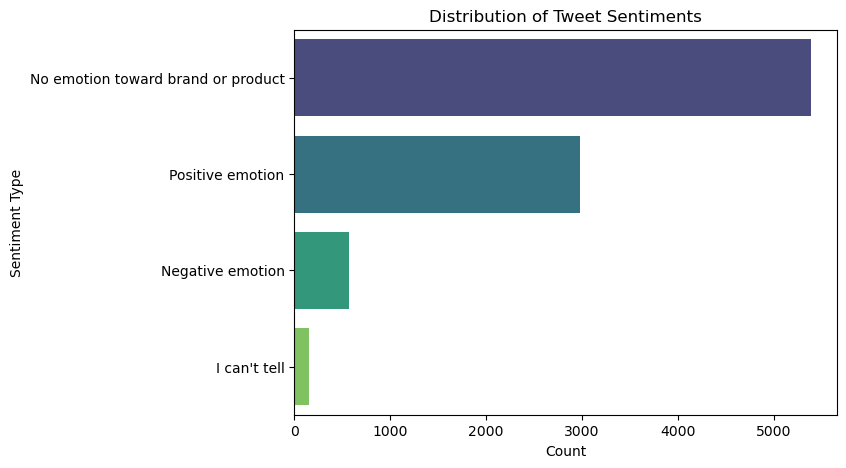

In [16]:
# Distribution of tweet sentiments
EDA.sentiment_distribution()

*  According to the  diagram above the highest sentiment is `no emotion toward the brand or product` followed by `positive emotion`.
*  This will be our target variable, and it requires  cleaning into 3 categories (positive, negative, neutral/no emotion)
* The dataset needs further cleaning since, it has  22(duplicates), the `emotion_in_tweet_is_directed_at` columns as 5802 missing values and the`tweet_text` test has 1 missing value.
*  So far, the data cannot be used for modelling since it's not ready. Let's implement the cleaning and preprocessing methods to make it fit for modelling. 

## Data Cleaning and preprocessing.

### Data cleaning class and preprocessing class

* This class contains:
*  **Basic cleaning**
 1.  The removal of duplicates processes from the dataframe
 2.  Filling of missing values  by  dropping subset row with  missing value and using a placeholder **Unknown**.
*  **Text preprocessing**
* 3. cleaning text by removing the non-word items like(#, @, !!, etc)
  4. Tokenize text by changing sentences into sepearte words.
  5. removing stopwords
  6. and lemmatizing the tokens
* **Visualization**
* 7. A histogram plotting the tweet length distribution.
  8. A bar graph plotting the  the word frequency distribution.

In [21]:
# corrected version.
class Data_cleaning_and_preprocessing:
    
    def __init__(self, Tweets_df: pd.DataFrame, text_column: str, brand_column: str = None, sentiment_column: str = None):
        self.df = Tweets_df.copy()
        self.text_column = text_column
        self.brand_column = brand_column
        self.sentiment_column = sentiment_column
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words("english"))

        # Filler or meaningless short tokens
        self.meaningless_words = {
            'rt', 'via', 'amp', 'im', 'u', 'ur', 'lol', 'dont', 'cant', 'ok',
            'yeah', 'ha', 'hmm', 'ah', 'ya', 'idk', 'na', 'omg', 'gt', 'lt'
        }

        # English dictionary
        self.english_vocab = set(w.lower() for w in words.words())
        self.allowed_custom = {'ipad', 'iphone', 'google', 'android', 'mac', 'ios', 'app', 'tweet', 'sxsw'}

    # ------------ BASIC CLEANING ----------------

    def remove_duplicates(self):
        self.df.drop_duplicates(inplace=True)
        print("Duplicates removed:", not self.df.duplicated().any())

    def handling_missing_values(self, text_column, sec_column=None):
        before = len(self.df)
        self.df = self.df.dropna(subset=[text_column])
        if sec_column:
            self.df[sec_column] = self.df[sec_column].fillna("Unknown")
        after = len(self.df)
        print(f"Missing values handled — {before - after} rows dropped, rest filled.")

    # ------------ TEXT PREPROCESSING --------------

    def Clean_text(self, text_column):
        def clean(tweet):
            tweet = tweet.lower().strip()
            tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)   # URLs
            tweet = re.sub(r"@\w+", '', tweet)                      # Mentions
            tweet = re.sub(r"#", '', tweet)                         # Hashtags
            tweet = re.sub(r"[^a-z\s]", '', tweet)                  # Non-letters
            tweet = re.sub(r"\s+", " ", tweet)                      # Extra spaces
            return tweet

        self.df[text_column] = self.df[text_column].apply(clean)
        print("Cleaning text complete.")
        print("Example cleaned text (index 0):", self.df[text_column].iloc[0])

    def tokenize_text(self):
        print("Tokenizing tweets...")
        self.df['tokens'] = self.df[self.text_column].apply(lambda x: word_tokenize(x))
        print("Tokenization complete.")
        print("Example tokenized text (index 0):", self.df['tokens'].iloc[0])

    def remove_stopwords(self):
        print("Removing stopwords and meaningless tokens...")
        before = self.df['tokens'].apply(len).sum()

        self.df['tokens'] = self.df['tokens'].apply(
            lambda x: [
                word for word in x
                if word.isalpha()
                and word not in self.stop_words
                and word not in self.meaningless_words
            ]
        )

        after = self.df['tokens'].apply(len).sum()
        print(f"Stopword removal complete. {before - after:,} tokens removed.")
        print("Example tokens after cleaning (index 0):", self.df['tokens'].iloc[0])

    def lemmatize_tokens(self):
        print("Lemmatizing tokens...")
        self.df['tokens'] = self.df['tokens'].apply(
            lambda x: [self.lemmatizer.lemmatize(word) for word in x]
        )
        print("Lemmatization complete.")
        print("Example lemmatized tokens (index 0):", self.df['tokens'].iloc[0])

    def remove_non_english_tokens(self):
        """
        Removes tokens that are not valid English words (unless in custom tech list).
        Keeps all word lengths — no cutoff on short words.
        """
        print("Removing non-English or nonsensical words (keeping short valid ones)...")
        before = self.df['tokens'].apply(len).sum()

        self.df['tokens'] = self.df['tokens'].apply(
            lambda x: [
                word for word in x
                if (word in self.english_vocab or word in self.allowed_custom)
            ]
        )

        after = self.df['tokens'].apply(len).sum()
        print(f"Non-English tokens removed. {before - after:,} tokens deleted.")
        print("Example cleaned tokens (index 0):", self.df['tokens'].iloc[0])

    # ------------ VISUALIZATIONS ----------------

    def plot_tweet_length_distribution(self):
        self.df['tweet_length'] = self.df[self.text_column].apply(len)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['tweet_length'], bins=30, kde=True, color="green")
        plt.title("Distribution of Tweet Lengths (with KDE)")
        plt.xlabel("Tweet Length (characters)")
        plt.ylabel("Frequency")
        plt.show()

    def plot_word_frequency(self, top_n=20):
        all_words = [word for tokens in self.df['tokens'] for word in tokens]
        common_words = Counter(all_words).most_common(top_n)
        freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
        plt.figure(figsize=(10, 6))
        sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')
        plt.title(f"Top {top_n} Most Frequent Words After Cleaning")
        plt.show()

    # ------------ EXPORT CLEAN DATA ---------------

    def get_processed_data(self):
        return self.df


In [22]:
# set the class in use 
cleaner = Data_cleaning_and_preprocessing(
    Tweets_df= Tweets_df,
    text_column='tweet_text',
    brand_column='emotion_in_tweet_is_directed_at',
    sentiment_column='is_there_an_emotion_directed_at_a_brand_or_product'
)


In [23]:
# handling duplicates
cleaner.remove_duplicates()

Duplicates removed: True


In [24]:
# handling missing val
cleaner.handling_missing_values(text_column='tweet_text', sec_column='emotion_in_tweet_is_directed_at')


Missing values handled — 1 rows dropped, rest filled.


In [25]:
# make the texts lowercase and remove non-words
cleaner.Clean_text("tweet_text")


Cleaning text complete.
Example cleaned text (index 0):  i have a g iphone after hrs tweeting at riseaustin it was dead i need to upgrade plugin stations at sxsw


In [26]:
# Tokenize the data
cleaner.tokenize_text()


Tokenizing tweets...
Tokenization complete.
Example tokenized text (index 0): ['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', 'riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']


In [27]:
# remove stop words 
cleaner.remove_stopwords()


Removing stopwords and meaningless tokens...
Stopword removal complete. 52,449 tokens removed.
Example tokens after cleaning (index 0): ['g', 'iphone', 'hrs', 'tweeting', 'riseaustin', 'dead', 'need', 'upgrade', 'plugin', 'stations', 'sxsw']


In [28]:
# lemmatize  the tokens
cleaner.lemmatize_tokens()

Lemmatizing tokens...
Lemmatization complete.
Example lemmatized tokens (index 0): ['g', 'iphone', 'hr', 'tweeting', 'riseaustin', 'dead', 'need', 'upgrade', 'plugin', 'station', 'sxsw']


In [29]:
cleaner.remove_non_english_tokens()

Removing non-English or nonsensical words (keeping short valid ones)...
Non-English tokens removed. 17,238 tokens deleted.
Example cleaned tokens (index 0): ['g', 'iphone', 'dead', 'need', 'upgrade', 'station', 'sxsw']


## Visualizations


### Bivariate and Multivariate analysis mostly in action

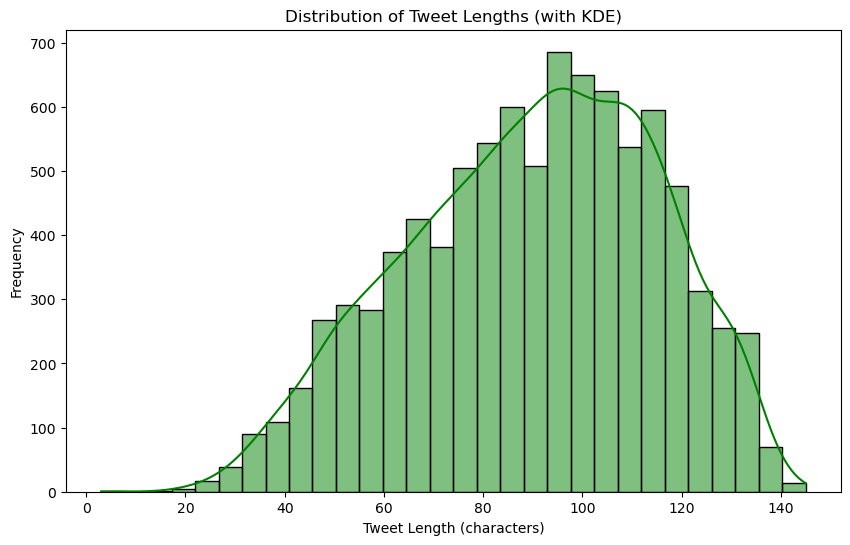

In [31]:
# A hist plot showing the length of the tweets.
cleaner.plot_tweet_length_distribution()

* The distribution of tweets lengths is slightly right-skewed, indicating that most tweets are moderately short(between 80 - 120 characters)
* This explains that twitter users  often express opinions concisely but occasionally write longer posts when elaborating on product experiences.


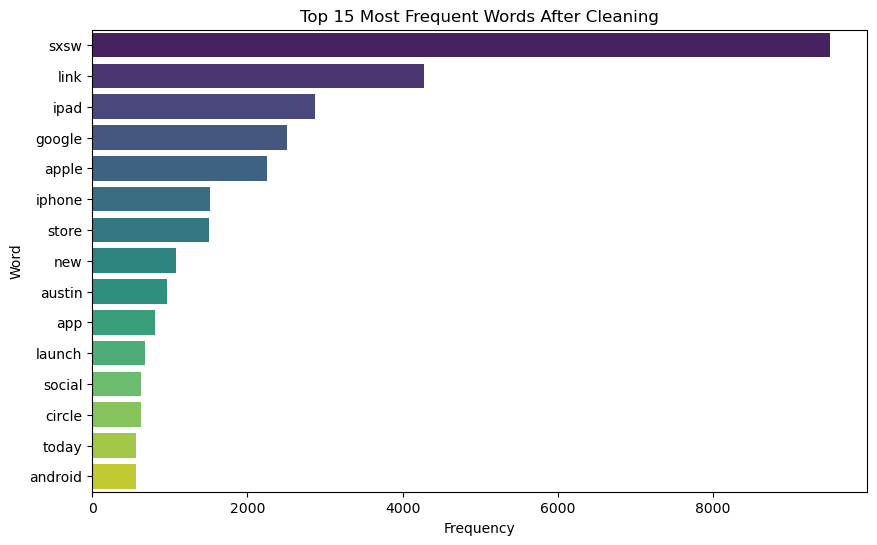

In [33]:
# A bar plot showing the word frequency
from collections import Counter
cleaner.plot_word_frequency(top_n=15)


* According to this bar plot, the data shows   to 20 common words that appear on the tokens. some of these words.
* some of the words like sxsw, link, rt, amp,sxswi  should be cleaned out ...

In [35]:
# Dataset Half way cleaned 
processed_df = cleaner.get_processed_data()
processed_df.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokens,tweet_length
0,i have a g iphone after hrs tweeting at risea...,iPhone,Negative emotion,"[g, iphone, dead, need, upgrade, station, sxsw]",105
1,know about awesome ipadiphone app that youll ...,iPad or iPhone App,Positive emotion,"[know, awesome, app, likely, appreciate, desig...",113
2,can not wait for ipad also they should sale t...,iPad,Positive emotion,"[wait, ipad, also, sale, sxsw]",62


* **The data looks better form the previous one. We now have to do some feature engineering that  will lead to more cleaning of this dataframe.**  

## Feature engineering

### Feature engineering class:
* This class contains the Mapping of sentiments to three categories,  which are (`Positive_emotion`, `Negative_emotion`, `Neutral/No_emotion`).
* It also contains the brand mapping  of the `emotion_in_tweet_is_directed_at` column  for more clarity.
* It also contains visuals of the actions taken.

In [39]:
processed_df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
Unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [40]:
class Feature_Engineering:
    
    def __init__(self, df: pd.DataFrame, text_col: str, brand_col: str, sentiment_col: str):
        self.df = df.copy()
        self.text_col = text_col
        self.brand_col = brand_col
        self.sentiment_col = sentiment_col

    # Sentiment Mapping
    def map_sentiments(self):
        sentiment_mapping = {
            'Positive emotion': 'Positive',
            'Negative emotion': 'Negative',
            "I can't tell": 'Neutral/No emotion',
            'No emotion toward brand or product': 'Neutral/No emotion'
        }
        self.df['mapped_sentiment'] = self.df[self.sentiment_col].map(sentiment_mapping)
        print("Sentiment mapping complete....")
        display(self.df[[self.sentiment_col, 'mapped_sentiment']].head(10))

    # Brand Mapping
    def map_brands(self):
        brand_mapping = {
            'iPad': 'Apple',
            'Apple': 'Apple',
            'iPad or iPhone App': 'Apple',
            'iPhone': 'Apple',
            'Other Apple product or service': 'Apple',
            'Google': 'Google',
            'Other Google product or service': 'Google',
            'Android App': 'Google',
            'Android': 'Google',
            'Unknown': 'Unknown'
        }
        # clean and normalize before mapping
        self.df[self.brand_col] = self.df[self.brand_col].astype(str).str.strip()
        # map
        self.df['mapped_brand'] = self.df[self.brand_col].map(brand_mapping)
        
        print("Brand mapping complete.")
        print("Brand distribution after mapping:")
        print(self.df['mapped_brand'].value_counts())
        
        display(self.df[[self.brand_col, 'mapped_brand']].head(10))
        

    # Text Feature Visualizations

    # Sentiment & Brand Visualizations
    def plot_sentiment_distribution(self):
        plt.figure(figsize=(11, 6))
        sns.countplot(data=self.df, x='mapped_sentiment', order=self.df['mapped_sentiment'].value_counts().index)
        plt.title("Distribution of Sentiment Categories")
        plt.xlabel("Sentiment Type")
        plt.ylabel("Tweet Count")
        plt.show()

    def plot_brand_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='mapped_brand', order=self.df['mapped_brand'].value_counts().index)
        plt.title("Distribution of Brand Mentions (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Tweet Count")
        plt.show()

    # Combined Brand vs Sentiment Plot
    def plot_brand_sentiment_comparison(self):
        """Compare brand mentions by sentiment category."""
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='mapped_brand', hue='mapped_sentiment', palette='cool')
        plt.title("Brand Mentions by Sentiment (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Count")
        plt.legend(title="Sentiment")
        plt.show()
        #having removed the Unknown category
    def plot_brand_sentiment_comparison_no_Unknown(self):

        filtered_df = self.df[self.df['mapped_brand'] != 'Unknown']
        plt.figure(figsize=(10, 6))
        sns.countplot(
        data=filtered_df,
        x='mapped_brand',
        hue='mapped_sentiment',
        palette='cool'
        )
        plt.title("Brand Mentions by Sentiment (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Count")
        plt.legend(title="Sentiment")
        plt.show()

    # Return processed data
    def get_features(self):
        # Return the processed DataFrame for modeling.
        return self.df


In [41]:
# Class in use 
# Initialize the class
features = Feature_Engineering(
    df=cleaner.get_processed_data(),
    text_col='tweet_text',
    brand_col='emotion_in_tweet_is_directed_at',
    sentiment_col='is_there_an_emotion_directed_at_a_brand_or_product'
)


In [42]:
# Run transformation
# Sentiment mappings 
features.map_sentiments()


Sentiment mapping complete....


,is_there_an_emotion_directed_at_a_brand_or_product,mapped_sentiment
0,Negative emotion,Negative
1,Positive emotion,Positive
2,Positive emotion,Positive
3,Negative emotion,Negative
4,Positive emotion,Positive
5,No emotion toward brand or product,Neutral/No emotion
7,Positive emotion,Positive
8,Positive emotion,Positive
9,Positive emotion,Positive
10,Positive emotion,Positive


In [43]:
# Brand mapping 
features.map_brands()


Brand mapping complete.
Brand distribution after mapping:
mapped_brand
Unknown    5788
Apple      2404
Google      878
Name: count, dtype: int64


,emotion_in_tweet_is_directed_at,mapped_brand
0,iPhone,Apple
1,iPad or iPhone App,Apple
2,iPad,Apple
3,iPad or iPhone App,Apple
4,Google,Google
5,Unknown,Unknown
7,Android,Google
8,iPad or iPhone App,Apple
9,Apple,Apple
10,Android,Google


## Visualize 

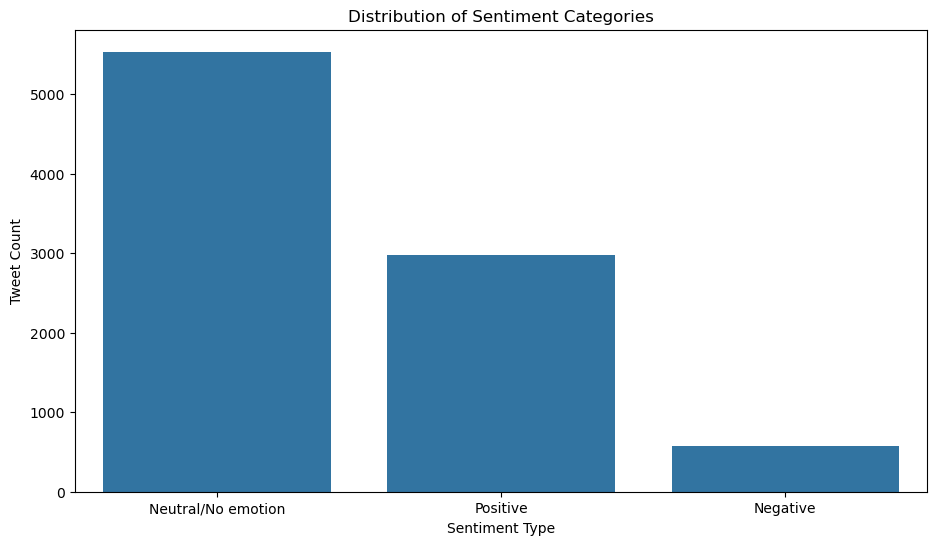

In [45]:
# sentiment Mapping visualization
features.plot_sentiment_distribution()


*  our target variable seems  to  very imbalance .
*  

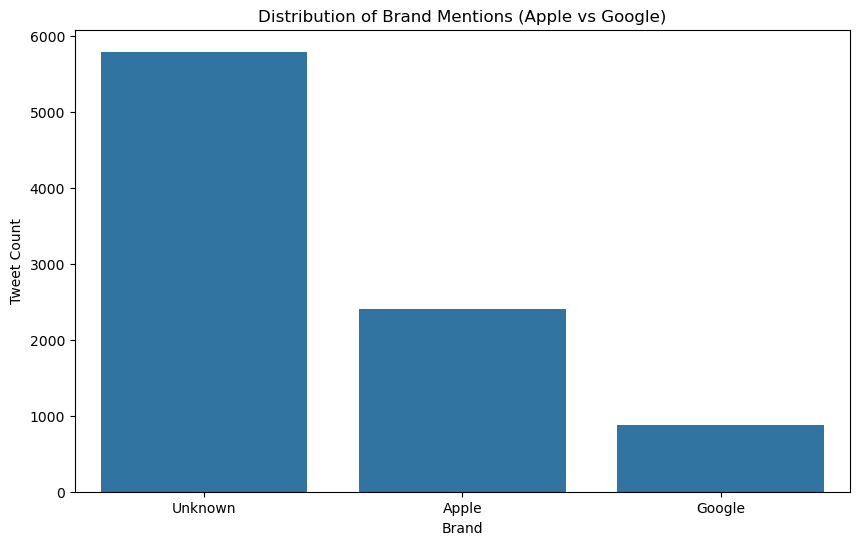

In [47]:
# Branding  mapping visualization
features.plot_brand_distribution()


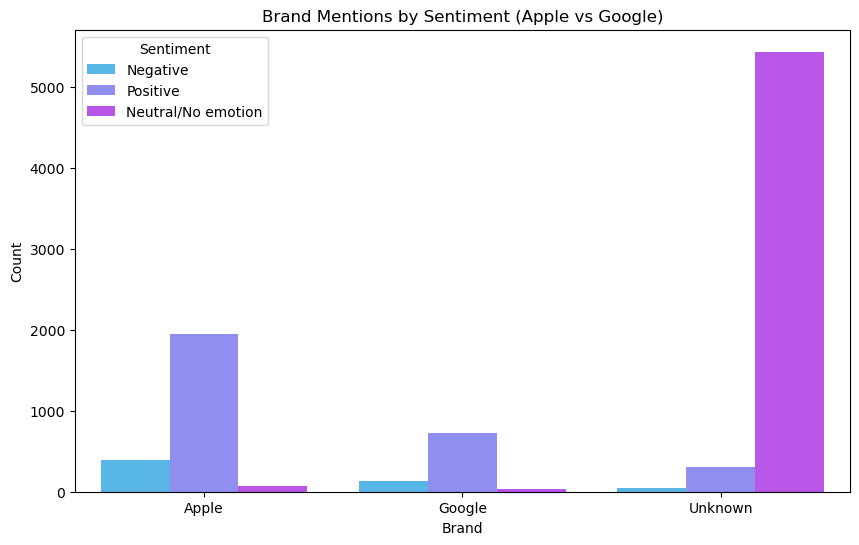

In [48]:
# comparison of the two 
features.plot_brand_sentiment_comparison()


#### Which of these two companies, Apple or Google, receives more positive or negative sentiment in tweets?

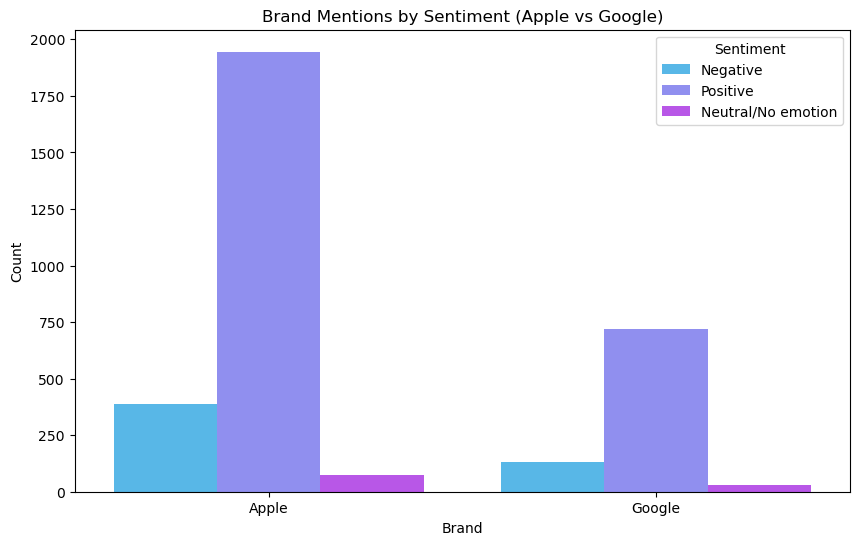

In [50]:
features.plot_brand_sentiment_comparison_no_Unknown()

*  The combined bar graph shows that the Apple brand receive more positive  and negative sentiments than the  google brand.

In [52]:
# Get the updated DataFrame
final_df = features.get_features()
final_df.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokens,tweet_length,mapped_sentiment,mapped_brand
0,i have a g iphone after hrs tweeting at risea...,iPhone,Negative emotion,"[g, iphone, dead, need, upgrade, station, sxsw]",105,Negative,Apple
1,know about awesome ipadiphone app that youll ...,iPad or iPhone App,Positive emotion,"[know, awesome, app, likely, appreciate, desig...",113,Positive,Apple
2,can not wait for ipad also they should sale t...,iPad,Positive emotion,"[wait, ipad, also, sale, sxsw]",62,Positive,Apple


### Encoding of the Target variable 

In [54]:
# label encode the  mapped_sentiment (target var)
from sklearn.preprocessing import LabelEncoder

encoder =LabelEncoder()
final_df['sentiment_label']= encoder.fit_transform(final_df['mapped_sentiment'])

print("encoded_data", final_df['sentiment_label'].value_counts().sort_index())
print("original_data", final_df['mapped_sentiment'].value_counts().sort_index())
print("classes:", encoder.classes_)

encoded_data sentiment_label
0     569
1    5531
2    2970
Name: count, dtype: int64
original_data mapped_sentiment
Negative               569
Neutral/No emotion    5531
Positive              2970
Name: count, dtype: int64
classes: ['Negative' 'Neutral/No emotion' 'Positive']


## NLP MODELS

### Using tweet_text as the X and y as the Sentiment_label 

In [57]:
# Use all data but create binary target
X = final_df['tweet_text']
# Create binary target: 1 for Positive (class 2), 0 for Negative (class 0), drop Neutral (class 1)
binary_mask = final_df['sentiment_label'].isin([0, 2])
X_binary = X[binary_mask]
y_binary = final_df.loc[binary_mask, 'sentiment_label'].map({0: 0, 2: 1})

print("Binary classification setup:")
print("X shape:", X_binary.shape)
print("y shape:", y_binary.shape)
print("y value counts (0=Negative, 1=Positive):")
print(y_binary.value_counts().sort_index())

Binary classification setup:
X shape: (3539,)
y shape: (3539,)
y value counts (0=Negative, 1=Positive):
sentiment_label
0     569
1    2970
Name: count, dtype: int64


In [58]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, 
    random_state=1, 
    test_size=0.2, 
    stratify=y_binary
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training class distribution:\n{y_train.value_counts().sort_index()}")
print(f"Testing class distribution:\n{y_test.value_counts().sort_index()}")


Training set size: 2831
Testing set size: 708
Training class distribution:
sentiment_label
0     455
1    2376
Name: count, dtype: int64
Testing class distribution:
sentiment_label
0    114
1    594
Name: count, dtype: int64


### Count Vectorization

In [60]:
## count vectorization
# Create CountVectorizer and transform data
#vectorizer = CountVectorizer(max_features=1000, stop_words='english')
#X_train_dtm = vectorizer.fit_transform(X_train)
#X_test_dtm = vectorizer.transform(X_test)

#print(f"\nAfter vectorization:")
#print(f"Training features shape: {X_train_dtm.shape}")
#print(f"Testing features shape: {X_test_dtm.shape}")

In [61]:
#from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transformer = TfidfTransformer()
#tfidf_transformer.fit(X_train_dtm)
#tfidf_transformer.transform(X_train_dtm)

### Tf-IDF Vectorization

In [63]:
# initialize the  vector 
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english' )  
   # limit number of features
    #ngram_range=(1, 2),
   # min_df=2,             # ignore infrequent terms
   # max_df=0.8,           # ignore overly common terms
  # remove English stopwords

 #Fit and transform the tweet text column
X_tfidf_bigrams = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_test_bigrams = tfidf_vectorizer.transform(X_test)

# Inspect results

print("TF-IDF bigram matrix shape:", X_tfidf_bigrams.shape)
print("Example bigram features:")
print(tfidf_vectorizer.get_feature_names_out()[:20])


TF-IDF bigram matrix shape: (2831, 1000)
Example bigram features:
['aapl' 'able' 'abt' 'aclu' 'acquired' 'action' 'actually' 'ad' 'added'
 'adoption' 'agileagency' 'agree' 'ahead' 'alarm' 'alternate' 'amazing'
 'america' 'americaquot' 'amp' 'ampipad']


## Binary classification models 

###  MultinomialNB Model

In [66]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [67]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit( X_tfidf_bigrams, y_train)

CPU times: total: 15.6 ms
Wall time: 13.9 ms


MultinomialNB()

=======MODEL EVALUATION METRICS===========
 Accuracy: 0.8588

 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.14      0.24       114
           1       0.86      1.00      0.92       594

    accuracy                           0.86       708
   macro avg       0.87      0.57      0.58       708
weighted avg       0.86      0.86      0.81       708


 Confusion Matrix:
[[ 16  98]
 [  2 592]]


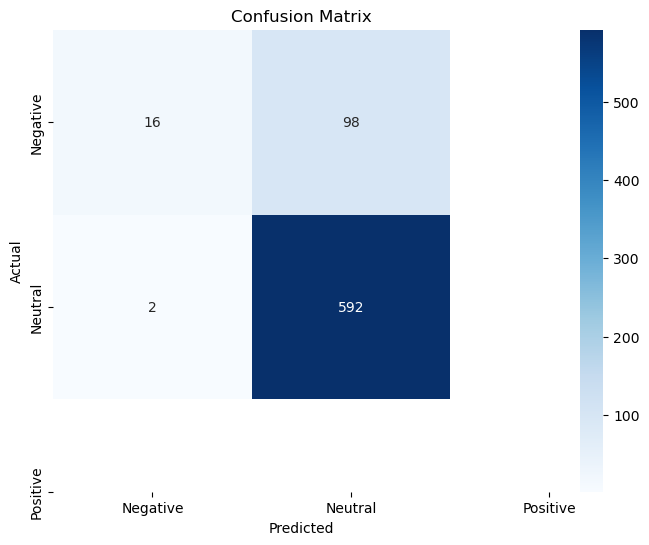


 Additional Metrics:
• Weighted Precision: 0.8629
• Weighted Recall: 0.8588
• Weighted F1-Score: 0.8127


In [68]:
from sklearn import metrics
# Make predictions
y_pred_class = nb.predict(X_tfidf_test_bigrams)
y_pred_proba = nb.predict_proba(X_tfidf_test_bigrams)  # If your model supports probability

print("=======MODEL EVALUATION METRICS===========")

# 1. Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print(f" Accuracy: {accuracy:.4f}")
print()

# 2. Classification Report
print(" Classification Report:")
print(metrics.classification_report(y_test, y_pred_class))
print()

# 3. Confusion Matrix with Visualization
class_names = ['Negative', 'Neutral', 'Positive']  # Update with your actual class names

cm = metrics.confusion_matrix(y_test, y_pred_class)
print(" Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 4. Additional Metrics
print("\n Additional Metrics:")
print(f"• Weighted Precision: {metrics.precision_score(y_test, y_pred_class, average='weighted'):.4f}")
print(f"• Weighted Recall: {metrics.recall_score(y_test, y_pred_class, average='weighted'):.4f}")
print(f"• Weighted F1-Score: {metrics.f1_score(y_test, y_pred_class, average='weighted'):.4f}")

###  Logistics Regression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. BASIC LOGISTIC REGRESSION
print("=== BASIC LOGISTIC REGRESSION ===")

# Create the pipeline
basic_lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=5,
        max_df=0.7
    )),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear'  # Good for small to medium datasets
    ))
])

# Train the model
print("Training basic Logistic Regression...")
basic_lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_basic = basic_lr_pipeline.predict(X_test)
y_pred_proba_basic = basic_lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
accuracy_basic = accuracy_score(y_test, y_pred_basic)
report = classification_report(y_test, y_pred_basic)
print(f"Basic Logistic Regression trained!")
print(f"Accuracy: {accuracy_basic:.4f}")
print(f"report: {report}")

=== BASIC LOGISTIC REGRESSION ===
Training basic Logistic Regression...
Basic Logistic Regression trained!
Accuracy: 0.8559
report:               precision    recall  f1-score   support

           0       0.83      0.13      0.23       114
           1       0.86      0.99      0.92       594

    accuracy                           0.86       708
   macro avg       0.84      0.56      0.57       708
weighted avg       0.85      0.86      0.81       708



### Modified Logistics 


--- Training Basic_LR ---

--- Training Balanced_LR ---

--- Training L1_Regularization ---

--- Training L2_Regularization ---

--- Training Tuned_LR ---

MODEL PERFORMANCE SUMMARY:

                   Accuracy  ROC-AUC  F1-Macro  F1-Positive  F1-Negative
Basic_LR             0.8559   0.7954    0.5739       0.9206       0.2273
Balanced_LR          0.7980   0.8081    0.6826       0.8740       0.4911
L1_Regularization    0.8573   0.7813    0.6072       0.9207       0.2937
L2_Regularization    0.8559   0.7952    0.5739       0.9206       0.2273
Tuned_LR             0.7585   0.7738    0.6586       0.8433       0.4738

Best models by key metrics:
F1-Macro: Balanced_LR (0.6826)
F1-Negative: Balanced_LR (0.4911)
ROC-AUC: Balanced_LR (0.8081)


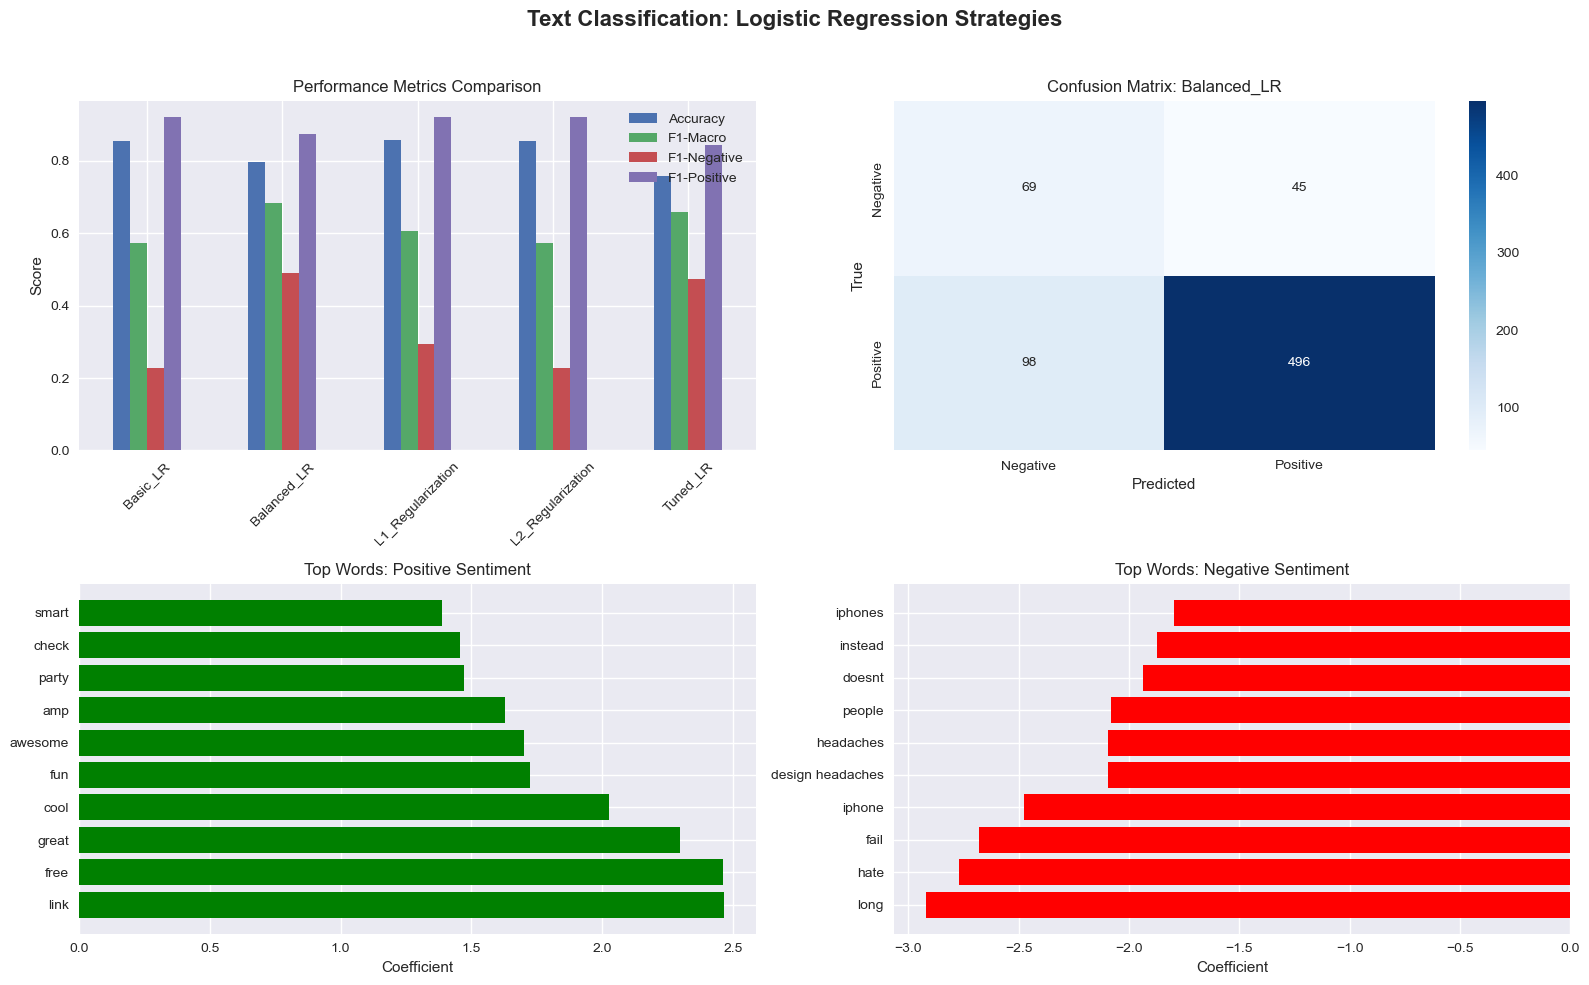


Using best model: Balanced_LR

Tweet 1:  check it rt sxsw free app festival explorer find the bands you want to see from your music tastes link
True: 1, Predicted: 1, Confidence: 0.933

Tweet 2: lol rt ill bet theres a lot of nerds at sxsw using the iphone light saber app in barroom brawls instead of their fists
True: 1, Predicted: 1, Confidence: 0.556

Tweet 3: about to surprise a customer waiting in line at the apple store in austin for the ipad with an sxsw cbatsxsw
True: 1, Predicted: 1, Confidence: 0.618

Tweet 4: great ui demo of on link xoom sxsw android tech tablet
True: 1, Predicted: 1, Confidence: 0.875

Tweet 5: rt quotthe future of local is contextual discoveryquot googles marissa mayer argues where is exceptionally valuable for any type of search sxsw
True: 1, Predicted: 1, Confidence: 0.780


Classification Report:

              precision    recall  f1-score   support

    Negative       0.41      0.61      0.49       114
    Positive       0.92      0.84      0.87     

In [72]:
# ============================================================
# MULTIPLE LOGISTIC REGRESSION STRATEGIES FOR TEXT CLASSIFICATION
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# ============================================================
# 1. DEFINE LOGISTIC REGRESSION STRATEGIES
# ============================================================

def define_strategies():
    return {
        'Basic_LR': {
            'solver': 'liblinear',
            'max_iter': 1000,
            'random_state': 42
        },
        'Balanced_LR': {
            'class_weight': 'balanced',
            'solver': 'liblinear',
            'max_iter': 1000,
            'random_state': 42
        },
        'L1_Regularization': {
            'penalty': 'l1',
            'solver': 'liblinear',
            'C': 1.0,
            'max_iter': 1000,
            'random_state': 42
        },
        'L2_Regularization': {
            'penalty': 'l2',
            'solver': 'lbfgs',
            'C': 1.0,
            'max_iter': 1000,
            'random_state': 42
        },
        'Tuned_LR': {
            'class_weight': 'balanced',
            'C': 0.1,
            'solver': 'liblinear',
            'max_iter': 1000,
            'random_state': 42
        }
    }

# ============================================================
# 2. TRAIN & EVALUATE STRATEGIES
# ============================================================

def train_and_evaluate_strategies(X_train, y_train, X_test, y_test):
    strategies = define_strategies()
    results = {}

    for name, params in strategies.items():
        print(f"\n--- Training {name} ---")

        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(
                max_features=5000,
                stop_words='english',
                ngram_range=(1, 2),
                min_df=5,
                max_df=0.7,
                lowercase=True,
                strip_accents='unicode'
            )),
            ('classifier', LogisticRegression(**params))
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        results[name] = {
            'model': pipeline,
            'accuracy': accuracy_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba),
            'f1_macro': f1_score(y_test, y_pred, average='macro'),
            'f1_positive': f1_score(y_test, y_pred, pos_label=1),
            'f1_negative': f1_score(y_test, y_pred, pos_label=0),
            'predictions': y_pred,
            'probabilities': y_proba
        }

    return results

# ============================================================
# 3. SUMMARIZE & COMPARE RESULTS
# ============================================================

def summarize_results(results):
    comparison_df = pd.DataFrame({
        name: {
            'Accuracy': res['accuracy'],
            'ROC-AUC': res['roc_auc'],
            'F1-Macro': res['f1_macro'],
            'F1-Positive': res['f1_positive'],
            'F1-Negative': res['f1_negative']
        } for name, res in results.items()
    }).T

    print("\nMODEL PERFORMANCE SUMMARY:\n")
    print(comparison_df.round(4))
    print("\nBest models by key metrics:")
    for metric in ['F1-Macro', 'F1-Negative', 'ROC-AUC']:
        best_model = comparison_df[metric].idxmax()
        best_score = comparison_df[metric].max()
        print(f"{metric}: {best_model} ({best_score:.4f})")

    return comparison_df

# ============================================================
# 4. VISUALIZE RESULTS
# ============================================================

def visualize_results(comparison_df, results, y_test):
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(16, 10))
    plt.suptitle("Text Classification: Logistic Regression Strategies", fontsize=16, fontweight='bold')

    # 4.1 Metric Comparison
    plt.subplot(2, 2, 1)
    metrics = ['Accuracy', 'F1-Macro', 'F1-Negative', 'F1-Positive']
    comparison_df[metrics].plot(kind='bar', ax=plt.gca())
    plt.title('Performance Metrics Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 4.2 Confusion Matrix for Best Model
    best_model_name = comparison_df['F1-Macro'].idxmax()
    best_model = results[best_model_name]['model']
    best_preds = results[best_model_name]['predictions']

    plt.subplot(2, 2, 2)
    cm = confusion_matrix(y_test, best_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {best_model_name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')

    # 4.3 Feature Importance (Positive)
    plt.subplot(2, 2, 3)
    feature_names = best_model.named_steps['tfidf'].get_feature_names_out()
    coefs = best_model.named_steps['classifier'].coef_[0]
    feature_importance = pd.DataFrame({'word': feature_names, 'coef': coefs})
    top_pos = feature_importance.nlargest(10, 'coef')
    plt.barh(top_pos['word'], top_pos['coef'], color='green')
    plt.title('Top Words: Positive Sentiment')
    plt.xlabel('Coefficient')

    # 4.4 Feature Importance (Negative)
    plt.subplot(2, 2, 4)
    top_neg = feature_importance.nsmallest(10, 'coef')
    plt.barh(top_neg['word'], top_neg['coef'], color='red')
    plt.title('Top Words: Negative Sentiment')
    plt.xlabel('Coefficient')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ============================================================
# 5. SAMPLE PREDICTIONS & REPORT
# ============================================================

def show_sample_predictions(X_test, y_test, results, comparison_df, n_samples=5):
    best_model_name = comparison_df['F1-Macro'].idxmax()
    best_model = results[best_model_name]['model']
    preds = results[best_model_name]['predictions']
    probs = results[best_model_name]['probabilities']

    print(f"\nUsing best model: {best_model_name}\n")

    indices = np.random.choice(len(X_test), size=n_samples, replace=False)
    for i, idx in enumerate(indices):
        tweet = X_test.iloc[idx] if hasattr(X_test, 'iloc') else X_test[idx]
        true_label = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
        pred_label = preds[idx]
        confidence = probs[idx]

        print(f"Tweet {i+1}: {tweet}")
        print(f"True: {true_label}, Predicted: {pred_label}, Confidence: {confidence:.3f}\n")

    print("\nClassification Report:\n")
    print(classification_report(y_test, preds, target_names=['Negative', 'Positive']))

# ============================================================
# 6. MASTER PIPELINE EXECUTION
# ============================================================

def run_logistic_regression_pipeline(X_train, y_train, X_test, y_test):
    results = train_and_evaluate_strategies(X_train, y_train, X_test, y_test)
    comparison_df = summarize_results(results)
    visualize_results(comparison_df, results, y_test)
    show_sample_predictions(X_test, y_test, results, comparison_df)

# ============================================================
# EXECUTION (Example)
# ============================================================
run_logistic_regression_pipeline(X_train, y_train, X_test, y_test)


### DistilBert fine-tuning pipeline

In [74]:
!pip install -q sentence-transformers


In [75]:
# ============================================================
# Fixed DistilBERT embeddings + LogisticRegression pipeline
# - no progress-bar widgets (avoids 'Error displaying widget')
# - robust handling so y_pred is always defined before evaluation
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# sentence_transformers import may raise ModuleNotFoundError if not installed
try:
    from sentence_transformers import SentenceTransformer
except Exception as e:
    raise ImportError("sentence-transformers is not installed. Run `pip install sentence-transformers`") from e


def run_distilbert_embedding_pipeline(X_train, y_train, X_test, y_test, model_name='distilbert-base-nli-mean-tokens'):
    """
    DistilBERT embeddings -> LogisticRegression classifier.
    - Resets indices, converts to lists
    - Disables widget progress bars (show_progress_bar=False)
    - Returns classifier, embedding_model, predictions
    """

    # 0. Basic checks
    if len(X_train) == 0 or len(X_test) == 0:
        raise ValueError("X_train/X_test appear empty. Please check your splits.")

    # 1. Reset indices (avoid Pandas KeyError)
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # 2. Convert to plain Python lists (SentenceTransformer expects list-like inputs)
    X_train_list = X_train.tolist()
    X_test_list = X_test.tolist()

    # 3. Load embedding model (no training)
    print("Loading SentenceTransformer model:", model_name)
    embedder = SentenceTransformer(model_name)

    # 4. Encode texts to embeddings (disable progress-bar widgets)
    print("Encoding training set to embeddings...")
    X_train_embeddings = embedder.encode(X_train_list, show_progress_bar=False, convert_to_numpy=True)
    print("Encoding test set to embeddings...")
    X_test_embeddings = embedder.encode(X_test_list, show_progress_bar=False, convert_to_numpy=True)

    # 5. Fit classifier
    print("Training Logistic Regression (class_weight='balanced')...")
    clf = LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear', random_state=42)
    clf.fit(X_train_embeddings, y_train)

    # 6. Predict (ensure this runs)
    try:
        y_pred = clf.predict(X_test_embeddings)
    except Exception as e:
        # If prediction fails, raise a clear message
        raise RuntimeError("Prediction with LogisticRegression failed.") from e

    # 7. Evaluation (safe because y_pred exists)
    labels = np.unique(np.concatenate([y_train.values if hasattr(y_train, "values") else y_train,
                                       y_test.values if hasattr(y_test, "values") else y_test]))
    labels = list(np.sort(labels))
    # define label names if common 2/3-class mapping is expected; otherwise generic
    if len(labels) == 2:
        label_names = ['Negative', 'Positive']
    elif len(labels) == 3:
        label_names = ['Negative', 'Positive', 'Neutral']
    else:
        label_names = [f'Class {i}' for i in labels]

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=label_names, digits=3))

    # 8. Confusion matrix (plot)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names,
                yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('DistilBERT Embeddings + Logistic Regression - Confusion Matrix')
    plt.tight_layout()
    plt.show()

    return clf, embedder, y_pred


Loading SentenceTransformer model: distilbert-base-nli-mean-tokens
Encoding training set to embeddings...
Encoding test set to embeddings...
Training Logistic Regression (class_weight='balanced')...

Classification Report:

              precision    recall  f1-score   support

    Negative      0.510     0.684     0.584       114
    Positive      0.935     0.874     0.903       594

    accuracy                          0.843       708
   macro avg      0.722     0.779     0.744       708
weighted avg      0.867     0.843     0.852       708



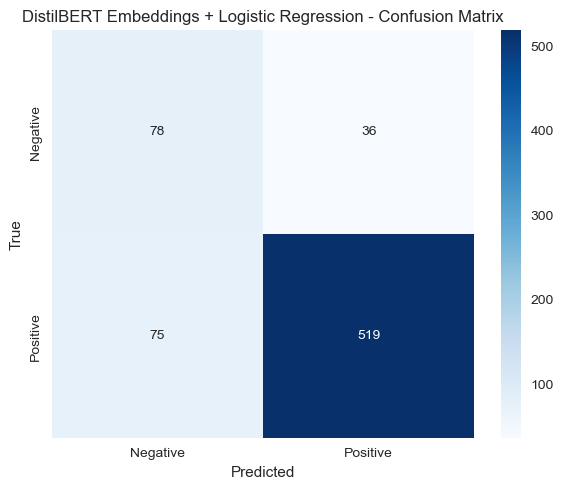

In [76]:
clf, embedder, y_pred = run_distilbert_embedding_pipeline(X_train, y_train, X_test, y_test)


## Multi-classification model.



=Brand Classification Report =
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       483
           1       0.52      0.52      0.52       178
           2       0.78      0.77      0.77      1153

    accuracy                           0.71      1814
   macro avg       0.64      0.64      0.64      1814
weighted avg       0.71      0.71      0.71      1814


=== Sentiment Classification Report ===
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       114
           1       0.74      0.83      0.78      1106
           2       0.63      0.49      0.56       594

    accuracy                           0.69      1814
   macro avg       0.59      0.58      0.58      1814
weighted avg       0.69      0.69      0.68      1814



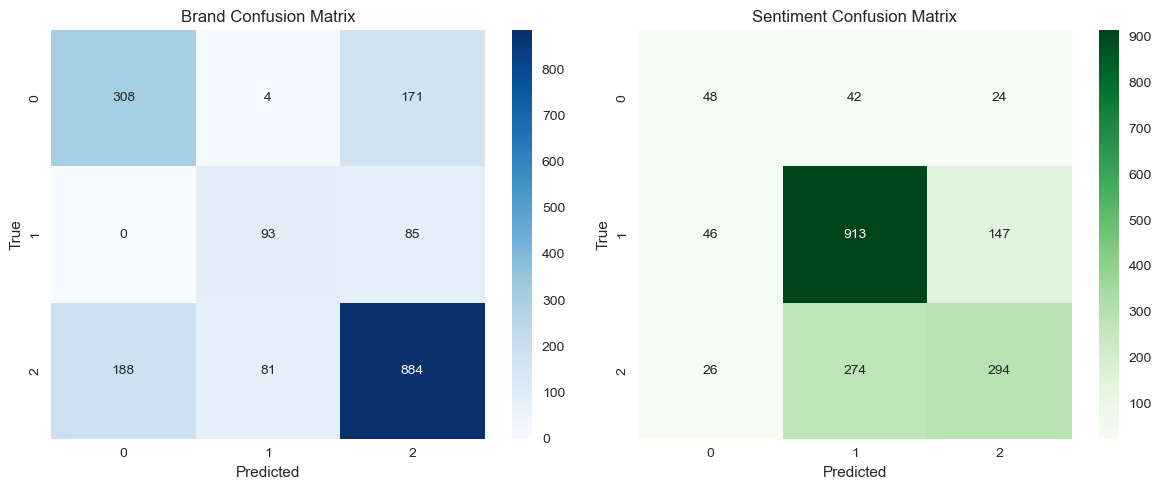


Brand Accuracy: 0.7084
Sentiment Accuracy: 0.6918


In [78]:
# ============================================================
# COMBINED BRAND + SENTIMENT 
# ============================================================

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================================
# 1. DATA PREPARATION
# ============================================================

# Example assumes your dataset is named final_df
# Columns: 'tweet_text', 'mapped_sentiment', 'mapped_brand'

df = final_df.copy()

# Encode brands (categorical) and ensure sentiment is numeric
from sklearn.preprocessing import LabelEncoder

brand_encoder = LabelEncoder()
df['brand_encoded'] = brand_encoder.fit_transform(df['mapped_brand'])

# Inputs and targets
X = df['tweet_text']
y_brand = df['brand_encoded']
y_sentiment = df['sentiment_label']

# Split data
X_train, X_test, y_train_brand, y_test_brand, y_train_sent, y_test_sent = train_test_split(
    X, y_brand, y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment
)

# Text vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# ============================================================
# 2. COMBINED PIPELINE FUNCTION
# ============================================================

def run_combined_pipeline(X_train_tfidf, X_test_tfidf, y_train_brand, y_test_brand, y_train_sent, y_test_sent):
    """
    Pipeline that predicts both brand and sentiment using a MultiOutputClassifier.
    Each output gets its own Logistic Regression model internally.
    """

    # Combine both targets into one dataframe
    y_train_combined = pd.concat([y_train_brand, y_train_sent], axis=1)
    y_test_combined = pd.concat([y_test_brand, y_test_sent], axis=1)
    y_train_combined.columns = ['brand', 'sentiment']
    y_test_combined.columns = ['brand', 'sentiment']

    # Define base model
    base_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')

    # Multi-output model (predicts both targets simultaneously)
    multi_output_model = MultiOutputClassifier(base_model)

    # Train
    multi_output_model.fit(X_train_tfidf, y_train_combined)

    # Predict
    y_pred_combined = multi_output_model.predict(X_test_tfidf)
    y_pred_brand = y_pred_combined[:, 0]
    y_pred_sent = y_pred_combined[:, 1]

    # Evaluation
    print("\n=Brand Classification Report =")
    print(classification_report(y_test_combined['brand'], y_pred_brand))

    print("\n=== Sentiment Classification Report ===")
    print(classification_report(y_test_combined['sentiment'], y_pred_sent))

    # Confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(confusion_matrix(y_test_combined['brand'], y_pred_brand), annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title("Brand Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")

    sns.heatmap(confusion_matrix(y_test_combined['sentiment'], y_pred_sent), annot=True, fmt='d', cmap='Greens', ax=axes[1])
    axes[1].set_title("Sentiment Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")

    plt.tight_layout()
    plt.show()

    # Summary accuracy
    brand_acc = accuracy_score(y_test_combined['brand'], y_pred_brand)
    sent_acc = accuracy_score(y_test_combined['sentiment'], y_pred_sent)
    print(f"\nBrand Accuracy: {brand_acc:.4f}")
    print(f"Sentiment Accuracy: {sent_acc:.4f}")

    return multi_output_model, vectorizer


# ============================================================
# 3. EXECUTION
# ============================================================

combined_model, tfidf_vectorizer = run_combined_pipeline(
    X_train_tfidf, X_test_tfidf,
    y_train_brand, y_test_brand,
    y_train_sent, y_test_sent
)
